In [15]:
# Importing libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import control as ctr
import pylab as pl
import sys

from control.matlab import c2d

# Log file to log the outputs
stdop = sys.stdout
sys.stdout = open("logFinalviva.txt", "w")

In [16]:
numerator = random.randint(0, 10)

coefficients = []
for i in range(3):
    coefficients.append(random.random())

g = ctr.TransferFunction(numerator, coefficients)

g

TransferFunction(array([9]), array([0.32253245, 0.77134995, 0.64758195]))

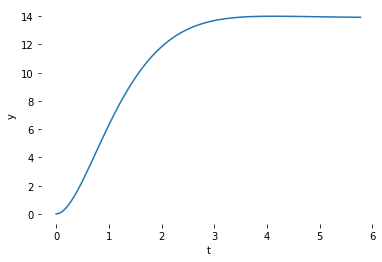

In [17]:
t, y = ctr.step_response(g)

# Removing the box around the graph
plt.box(False)

# Labelling axes
plt.xlabel('t')
plt.ylabel('y')

plt.plot(t, y)


In [18]:
print("Understanding the shape of the axes:")

print('t:', np.shape(t), '| y:', np.shape(y))
print('\nPrinting t:', t, '\nPrinting y:', y, sep='\n')

In [19]:
discG = c2d(g, 0.25)

discG

TransferFunction(array([0.71417326, 0.58494886]), array([ 1.        , -1.45649686,  0.54997331]), 0.25)

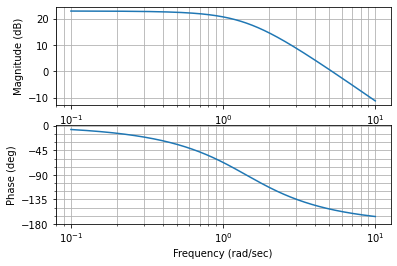

In [20]:
temp = ctr.bode(g)

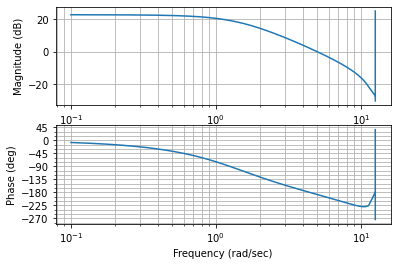

In [21]:
temp = ctr.bode(discG)

In [22]:
# Closing the log file
sys.stdout.close()
sys.stdout = stdop

## Implementation of Kalman Filtering 

Kalman filtering is carried out in 2 steps, Prediction and Update.  

Applications: predicting accurate information that's continuously updated about the position and velocity of an object given some sequence of observations about its position, radar, self driving cars' sensors predicting several other objects. 

Using this filter is with the acknowledgement that error and noise in implicit within both the prediction and measurement.

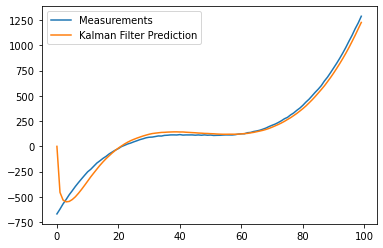

In [26]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)

        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))

        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))

        self.x = self.x + np.dot(K, y)

        I = np.eye(self.n)

        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P),
                         
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

def values():
	dt = 3.0/60
	F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
	H = np.array([1, 0, 0]).reshape(1, 3)
	Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.5], [0.0, 0.0, 0.0]])
	R = np.array([0.5]).reshape(1, 1)

	x = np.linspace(-10, 10, 100)
	measurements =  (x**3 + 2*(x**2) - 2*x + 100)  + np.random.normal(10, 2, 100)

	kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
	predictions = []

	for z in measurements:
		predictions.append(np.dot(H,  kf.predict())[0])
		kf.update(z)
  

	import matplotlib.pyplot as plt
	plt.plot(range(len(measurements)), measurements, label = 'Measurements')
	plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
	plt.legend()
	plt.show()

if __name__ == '__main__':
    values()